# Capstone Project - The Battle of Neighborhoods (Manchester)

## Topic: Finding the best place to move to in Manchester

### Date: 20 June 2020
### Author: Ricky To

## Introduction

### 1. Description of the Problem

This project will focus on Mr Willis, Mr Willis is married  to his Wife Mrs Willis for 9 years and they have one Daughter who is currently in Primary School.  They are currently overseas residing in Singapore as expatriates and have been doing so for the past 5 years, however  they wish to return to the United Kingdom but at the same time wish to move to one of the major UK cities.  One of the major cities that they are targeting is Manchester, however aside from having visited Manchester in the past, they have never spent a great deal of time there and do not know anyone there to assist.

They want to move to a location that is quiet, within budget and has restaurants and schools nearby.   
What we want to do is to help Mr Willis and his family determine which of the boroughs in Greater Manchester can be called their future home through the collection and analysis of publicly available data on the web.


**City Background**  


Manchester is a city and metropolitan borough in Greater Manchester, England. It is historically and traditionally a part of the county of Lancashire. It has a population of 547,627 as of 2018 (making it the fifth most populous English district). It lies within the United Kingdom's second-most populous urban area, with a population of 2.5 million and third most populous metropolitan area, with a population of 3.3 million. It is fringed by the Cheshire Plain to the south, the Pennines to the north and east, and an arc of towns with which it forms a continuous conurbation. The local authority for the city is Manchester City Council.

#### 2. Data Acquisition and Preprocessing
In this project, I will be using the following datasets to help solve my problem - 

1. Manchester Recorded Crime - https://data.police.uk/

2. List of Manchester Boroughs - https://en.wikipedia.org/wiki/List_of_places_in_Greater_Manchester
,and   Manchester PostCodes - https://simple.wikipedia.org/wiki/M_postcode_area#:~:text=The%20M%20postcode%20area%2C%20also,Manchester%20boroughs%20except%20for%20Stockport.

3. List of Bourough Latitude and Longitudes - Google Maps

3. Foursquare API.

4. Demographics of Manchester - https://www.citypopulation.de/en/uk/greatermanchester/  or https://en.wikipedia.org/wiki/List_of_Greater_Manchester_settlements_by_population

General References: https://mappinggm.org.uk/metadata/


Let's have a look at them.

###Import the Necessary Libraries

In [122]:
import pandas as pd
import numpy as np

###**List of Manchester Boroughs**   
* Information on boroughs and their population & coordinates   
 for better comparison.   
 -Coordinates can be used to get neighborhood data from Foursquare.   
* source: Wikipedia   
* url: https://en.wikipedia.org/wiki/List_of_places_in_Greater_Manchester 

In [123]:
import requests
import lxml
from bs4 import BeautifulSoup

In [124]:
# Obtaining data from Wikipedia
source = requests.get('https://en.wikipedia.org/wiki/List_of_Greater_Manchester_settlements_by_population').text
soup = BeautifulSoup(source, 'lxml')
soup.encode("utf-8-sig")

b'\xef\xbb\xbf<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n<head>\n<meta charset="utf-8-sig"/>\n<title>List of Greater Manchester settlements by population - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"45b88a5a-16a5-4b33-a302-d7a1374c8df2","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_Greater_Manchester_settlements_by_population","wgTitle":"List of Greater Manchester settlements by population","wgCurRevisionId":948659388,"wgRevisionId":948659388,"wgArticleId":52239616,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short descript

In [125]:
My_table = soup.find('table',{'class':'wikitable sortable'})

In [126]:
BoroughName = []
Population = []


for row in My_table.find_all('tr'):
    cells = row.find_all('td')
    if len(cells) > 0:
        BoroughName.append(cells[1].text.rstrip('\n'))
        Population.append(cells[3].text.rstrip('\n'))
  

In [127]:
# Form a dataframe
dict = {'Borough' : BoroughName,'Population' : Population}

info = pd.DataFrame.from_dict(dict)
info

,Borough,Population
0,Manchester‡ (see notes),"510,746"
1,Bolton,"194,189"
2,Sale,"134,022"
3,Rochdale,"107,926"
4,Stockport,"105,878"
...,...,...
61,,
62,Aspull,"4,899"
63,Hattersley,"4,825"
64,High Lane,"4,608"


In [128]:
#Remove Suffix from Manchester
info.loc[0, 'Borough'] = 'Manchester'
info

,Borough,Population
0,Manchester,"510,746"
1,Bolton,"194,189"
2,Sale,"134,022"
3,Rochdale,"107,926"
4,Stockport,"105,878"
...,...,...
61,,
62,Aspull,"4,899"
63,Hattersley,"4,825"
64,High Lane,"4,608"


### **Get the Latitude and Longitude of each Manchester Borough**

In [129]:
url_1 = 'https://raw.githubusercontent.com/Rwk2/Coursera_Capstone/master/List%20of%20Manchester%20Boroughs%20-%20Long%20%2B%20Lat%20-%20Sheet1.csv'

LatLng = pd.read_csv(url_1)
LatLng.head()

,Borough,Latitude,Longitude
0,Bolton,53.576866,-2.428219
1,Bury,53.593460,-2.298540
2,Cheshire East,42.849270,-72.261040
3,Manchester,53.480759,-2.242631
4,Oldham,53.540932,-2.111366


### **Manchester Recorded Crime**   
* Manchester crime records by boroughs in the last 1 month   
* source: data police   
* url: https://data.police.uk/

In [130]:
# Read crime records data
url = 'https://raw.githubusercontent.com/Rwk2/Coursera_Capstone/master/2019-06-greater-manchester.csv'

crime = pd.read_csv(url)
crime.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context,Borough
0,NaN,2019-06,Greater Manchester Police,Greater Manchester Police,-2.464422,53.612495,On or near Parking Area,E01004768,Bolton 001A,Anti-social behaviour,NaN,NaN,Bolton
1,aa1cc4cb0c436f463635890bcb4ff2cba08f599250b5bb...,2019-06,Greater Manchester Police,Greater Manchester Police,-2.441166,53.616044,On or near Pitcombe Close,E01004768,Bolton 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,Bolton
2,e513df6325ec2043d6b53c7888329f14eb66c8ea8217af...,2019-06,Greater Manchester Police,Greater Manchester Police,-2.444807,53.611509,On or near Belmont Road,E01004768,Bolton 001A,Violence and sexual offences,Unable to prosecute suspect,NaN,Bolton
3,6ed763df57793b0ab4ab0a1962aab3e577577ddb8d382e...,2019-06,Greater Manchester Police,Greater Manchester Police,-2.444807,53.611509,On or near Belmont Road,E01004768,Bolton 001A,Violence and sexual offences,Status update unavailable,NaN,Bolton
4,780d55b86bf1b85467f56404b01271c6bad54db206f07d...,2019-06,Greater Manchester Police,Greater Manchester Police,-2.448666,53.606272,On or near Sports/Recreation Area,E01004768,Bolton 001A,Violence and sexual offences,Status update unavailable,NaN,Bolton


In [131]:
# Dimension of Data
crime.shape

(32058, 13)

In [132]:
# Names of Boroughs
Names = crime['Borough'].unique()

In [133]:
BoroughOnly = crime[['Borough']]
BoroughOnly['Number']=1

BoroughOnly

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Borough,Number
0,Bolton,1
1,Bolton,1
2,Bolton,1
3,Bolton,1
4,Bolton,1
...,...,...
32053,Wigan,1
32054,Wigan,1
32055,Wigan,1
32056,Wigan,1


In [134]:
crimeBrgh = BoroughOnly.groupby('Borough',as_index=False, sort=False, group_keys=True).sum()

crimeBrgh

,Borough,Number
0,Bolton,3609
1,Bury,1822
2,Cheshire East,6
3,Manchester,8828
4,Oldham,2842
5,Rochdale,2510
6,Rossendale,1
7,Salford,2771
8,Stockport,2424
9,Tameside,2548


In [135]:
print (crimeBrgh.dtypes)
print (info.dtypes)

Borough    object
Number      int64
dtype: object
Borough       object
Population    object
dtype: object


### **List of Property Price Paid**

In [137]:
#Read Property Prices
url_PP = 'https://raw.githubusercontent.com/Rwk2/Coursera_Capstone/master/PropertyPaidUK-2020.csv'

mcr_pp = pd.read_csv(url_PP,names=["ID","Price_Paid","Date","PostCode","PropertyType","Old/New","Duration","PAON","SAON","Street","Locality", "Town", "District", "County","PPD","RecordStatus"])
mcr_pp.head()



,ID,Price_Paid,Date,PostCode,PropertyType,Old/New,Duration,PAON,SAON,Street,Locality,Town,District,County,PPD,RecordStatus
0,{A2479555-84B1-74C7-E053-6B04A8C0887D},266000,13-02-20 0:00,YO26,T,N,F,1,NaN,MONARCH WAY,NaN,YORK,YORK,YORK,A,A
1,{A2479555-84B2-74C7-E053-6B04A8C0887D},315000,14-02-20 0:00,LS25,D,N,F,67,NaN,CHURCH HILL,SHERBURN IN ELMET,LEEDS,SELBY,NORTH YORKSHIRE,A,A
2,{A2479555-84B3-74C7-E053-6B04A8C0887D},136000,06-03-20 0:00,LS24,F,N,L,28,NaN,BRIDGE CLOSE,CHURCH FENTON,TADCASTER,SELBY,NORTH YORKSHIRE,A,A
3,{A2479555-84B4-74C7-E053-6B04A8C0887D},155000,28-02-20 0:00,YO7,S,N,F,4,NaN,GEORGE COURT,SOWERBY,THIRSK,HAMBLETON,NORTH YORKSHIRE,A,A
4,{A2479555-84B5-74C7-E053-6B04A8C0887D},261000,17-02-20 0:00,YO7,S,N,F,30,NaN,SAXTY WAY,SOWERBY,THIRSK,HAMBLETON,NORTH YORKSHIRE,A,A


In [138]:
#drop unneeded columns
mcr_pp2=mcr_pp.drop(["ID","Date","PostCode","PropertyType","Old/New","Duration","PAON","SAON","Street","Locality", "Town","County","PPD","RecordStatus"], axis=1)
mcr_pp2

,Price_Paid,District
0,266000,YORK
1,315000,SELBY
2,136000,SELBY
3,155000,HAMBLETON
4,261000,HAMBLETON
...,...,...
112455,225000,SOUTH GLOUCESTERSHIRE
112456,278000,SOUTH GLOUCESTERSHIRE
112457,312000,NORTH SOMERSET
112458,327000,SOUTH GLOUCESTERSHIRE


In [139]:
#Get Median Price of Each District
mcr_pp3 = mcr_pp2.groupby('District')['Price_Paid'].median().to_frame(name = 'Median-PricePaid').reset_index()
mcr_pp3.head()

,District,Median-PricePaid
0,ADUR,315000.0
1,ALLERDALE,161000.0
2,AMBER VALLEY,169000.0
3,ARUN,275000.0
4,ASHFIELD,137000.0


In [140]:
#Get Mean Price of Each District
mcr_pp4 = mcr_pp2.groupby('District')['Price_Paid'].mean().to_frame(name = 'Mean-PricePaid').reset_index()
mcr_pp4.head()

,District,Mean-PricePaid
0,ADUR,359101.666667
1,ALLERDALE,192611.148325
2,AMBER VALLEY,197349.143969
3,ARUN,324886.803483
4,ASHFIELD,168679.478405


In [141]:
McrCoord = info.merge(LatLng, left_on='Borough', right_on='Borough')
McrCoord

,Borough,Population,Latitude,Longitude
0,Manchester,"510,746",53.480759,-2.242631
1,Bolton,"194,189",53.576866,-2.428219
2,Rochdale,"107,926",53.613600,-2.156100
3,Stockport,"105,878",53.410600,-2.157500
4,Salford,"103,886",53.487500,-2.290100
5,Wigan,"103,608",53.545100,-2.632500
6,Oldham,"96,555",53.540932,-2.111366
7,Bury,"77,211",53.593460,-2.298540


#### **Merge the Property Dataframes**

In [142]:
#To get the dataframes to merge we must make the cases the same
McrCoord['borough_lower'] = McrCoord['Borough'].str.lower()
mcr_pp3['district_lower'] = mcr_pp3['District'].str.lower()
mcr_pp4['district_lower'] = mcr_pp4['District'].str.lower()

In [143]:
PropertyLocMedian = McrCoord.merge(mcr_pp3, left_on='borough_lower', right_on="district_lower")
PropertyLocMedian.head()

,Borough,Population,Latitude,Longitude,borough_lower,District,Median-PricePaid,district_lower
0,Manchester,"510,746",53.480759,-2.242631,manchester,MANCHESTER,165000.0,manchester
1,Bolton,"194,189",53.576866,-2.428219,bolton,BOLTON,128000.0,bolton
2,Rochdale,"107,926",53.613600,-2.156100,rochdale,ROCHDALE,125000.0,rochdale
3,Stockport,"105,878",53.410600,-2.157500,stockport,STOCKPORT,230050.0,stockport
4,Salford,"103,886",53.487500,-2.290100,salford,SALFORD,150010.0,salford


In [144]:
PropertyLocMedianMean = PropertyLocMedian.merge(mcr_pp4, left_on='borough_lower', right_on="district_lower")
PropertyLocMedianMean.head()

,Borough,Population,Latitude,Longitude,borough_lower,District_x,Median-PricePaid,district_lower_x,District_y,Mean-PricePaid,district_lower_y
0,Manchester,"510,746",53.480759,-2.242631,manchester,MANCHESTER,165000.0,manchester,MANCHESTER,226208.930079,manchester
1,Bolton,"194,189",53.576866,-2.428219,bolton,BOLTON,128000.0,bolton,BOLTON,165499.729730,bolton
2,Rochdale,"107,926",53.613600,-2.156100,rochdale,ROCHDALE,125000.0,rochdale,ROCHDALE,148055.183024,rochdale
3,Stockport,"105,878",53.410600,-2.157500,stockport,STOCKPORT,230050.0,stockport,STOCKPORT,282065.896332,stockport
4,Salford,"103,886",53.487500,-2.290100,salford,SALFORD,150010.0,salford,SALFORD,193393.930185,salford


In [145]:
PropertyLocMedianMean.drop(['borough_lower', 'District_x','district_lower_x','District_y','district_lower_y'], axis=1, inplace=True)
PropertyLocMedianMean

,Borough,Population,Latitude,Longitude,Median-PricePaid,Mean-PricePaid
0,Manchester,"510,746",53.480759,-2.242631,165000.0,226208.930079
1,Bolton,"194,189",53.576866,-2.428219,128000.0,165499.729730
2,Rochdale,"107,926",53.613600,-2.156100,125000.0,148055.183024
3,Stockport,"105,878",53.410600,-2.157500,230050.0,282065.896332
4,Salford,"103,886",53.487500,-2.290100,150010.0,193393.930185
5,Wigan,"103,608",53.545100,-2.632500,125000.0,172105.265248
6,Oldham,"96,555",53.540932,-2.111366,125000.0,146423.039216
7,Bury,"77,211",53.593460,-2.298540,160000.0,181432.515850


### **Restaurants in each Borough**

**c. Foursquare API**   
* List of top 100 popular places in the neighborhood
* source: Foursquare
* url: https://api.foursquare.com

In [146]:
# Foursquare credentials
CLIENT_ID = 'OWUYXLPUKWIJJZBKVFLGHAQZ1YQAE0134OXJYJ3XK1H3UVII' # your Foursquare ID
CLIENT_SECRET = 'BZX5XP0CRATSNJS2BCOCWBHPPMOFE3RYBDS5ZGWGCECHKYCD' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: OWUYXLPUKWIJJZBKVFLGHAQZ1YQAE0134OXJYJ3XK1H3UVII
CLIENT_SECRET:BZX5XP0CRATSNJS2BCOCWBHPPMOFE3RYBDS5ZGWGCECHKYCD


In [147]:
#Create a function to explore all borough
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['BoroughName', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [148]:
#Get top 100 venues in 3000m radius of the center of each Borough
LIMIT = 100
venues = getNearbyVenues(names=McrCoord['Borough'],
                                   latitudes=McrCoord['Latitude'],
                                   longitudes=McrCoord['Longitude']
                                  )

Manchester
Bolton
Rochdale
Stockport
Salford
Wigan
Oldham
Bury


In [149]:
print(venues.shape)
venues.head()

(648, 7)


,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Manchester,53.480759,-2.242631,Café Beermoth,53.481359,-2.241902,Bar
1,Manchester,53.480759,-2.242631,Royal Exchange Theatre,53.482555,-2.244770,Theater
2,Manchester,53.480759,-2.242631,Manchester Art Gallery,53.478882,-2.241817,Art Gallery
3,Manchester,53.480759,-2.242631,Northern Soul • Grilled Cheese,53.483074,-2.238303,Sandwich Place
4,Manchester,53.480759,-2.242631,Hotel Gotham,53.480767,-2.242235,Hotel


In [150]:
venuegroups = venues.groupby('BoroughName').nunique()
venuegroups.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue Latitude'], axis = 1, inplace = True)
venuegroups

,BoroughName,Venue,Venue Category
BoroughName,,,
Bolton,1,69,42
Bury,1,48,32
Manchester,1,97,61
Oldham,1,60,41
Rochdale,1,48,34
Salford,1,96,55
Stockport,1,82,44
Wigan,1,75,45


In [151]:
restaurants = venues[(venues['Venue'].str.contains('Chinese', regex=False)) ].groupby(['BoroughName']).count()
restaurants.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
restaurants.rename(columns = {'Venue':'Number of restaurants'}, inplace=True)
restaurants.head()

,Venue Category
BoroughName,
Bolton,1
Wigan,2


In [152]:
restaurants1 = venues[(venues['Venue Category'].str.contains('Restaurant', regex=False))].groupby(['BoroughName']).count()
restaurants1.drop(['Borough Latitude', 'Borough Longitude', 'Venue Longitude', 'Venue', 'Venue Latitude'], axis = 1, inplace = True)
restaurants1.rename(columns = {'Venue Category':'Number of restaurants'}, inplace=True)
restaurants1.head()

,Number of restaurants
BoroughName,
Bolton,11
Bury,5
Manchester,17
Oldham,15
Rochdale,6


**Restaurant Location**

In [153]:
restaurantloc = venues[(venues['Venue Category'].str.contains('Restaurant', regex=False))]
restaurantloc

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
24,Manchester,53.480759,-2.242631,Dishoom,53.481311,-2.250180,Indian Restaurant
28,Manchester,53.480759,-2.242631,This & That,53.484776,-2.237807,Indian Restaurant
31,Manchester,53.480759,-2.242631,Bundobust,53.480870,-2.234693,Indian Restaurant
33,Manchester,53.480759,-2.242631,20 Stories,53.479172,-2.252109,Restaurant
34,Manchester,53.480759,-2.242631,V-Rev,53.484448,-2.236540,Vegetarian / Vegan Restaurant
...,...,...,...,...,...,...,...
599,Bury,53.593460,-2.298540,Nando's,53.594018,-2.291148,Portuguese Restaurant
630,Bury,53.593460,-2.298540,McDonald's,53.595566,-2.296588,Fast Food Restaurant
637,Bury,53.593460,-2.298540,Burger King,53.592452,-2.270017,Fast Food Restaurant
645,Bury,53.593460,-2.298540,Rapallo,53.601082,-2.339811,Italian Restaurant


### **Schools in each Borough**

In [154]:
url_school = 'https://raw.githubusercontent.com/Rwk2/Coursera_Capstone/master/england_ks2final-Schools%202019.csv'

school = pd.read_csv(url_school)
school = school[['SCHNAME','TOWN','PCON_NAME','READ_AVERAGE','MAT_AVERAGE']]
school

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,1,9,10,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SCHNAME,TOWN,PCON_NAME,READ_AVERAGE,MAT_AVERAGE
0,Bringhurst Primary School,Market Harborough,Rutland and Melton,110,110
1,Buckminster Primary School,Grantham,Rutland and Melton,106,103
2,Great Dalby School,Melton Mowbray,Rutland and Melton,108,108
3,Burton-on-the-Wolds Primary School,Loughborough,Loughborough,109,110
4,Belvoirdale Community Primary School,Coalville,North West Leicestershire,99,100
...,...,...,...,...,...
16503,Surrey,,,106,106
16504,Warwickshire,,,105,105
16505,West Sussex,,,105,104
16506,,,,104,105


In [155]:
#Drop empty Values
nan_value = float("NaN")
#Convert NaN values to empty string

school.replace(" ", nan_value, inplace=True)

school.dropna(subset = ["TOWN", "READ_AVERAGE"], inplace=True)
school

,SCHNAME,TOWN,PCON_NAME,READ_AVERAGE,MAT_AVERAGE
0,Bringhurst Primary School,Market Harborough,Rutland and Melton,110,110
1,Buckminster Primary School,Grantham,Rutland and Melton,106,103
2,Great Dalby School,Melton Mowbray,Rutland and Melton,108,108
3,Burton-on-the-Wolds Primary School,Loughborough,Loughborough,109,110
4,Belvoirdale Community Primary School,Coalville,North West Leicestershire,99,100
...,...,...,...,...,...
16338,Arden Fields,Henley-in-Arden,Stratford-on-Avon,86,85
16339,Quest Academy,Rugby,Rugby,93,97
16348,"Queen Elizabeth II Silver Jubilee School, Horsham",Horsham,Horsham,SUPP,SUPP
16352,Brantridge School,Haywards Heath,Mid Sussex,97,89


In [156]:
#Remove non-integer values
school['Read_AverageScoreNew']=pd.to_numeric(school.READ_AVERAGE.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
school['Mat_AverageScoreNew']=pd.to_numeric(school.MAT_AVERAGE.astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
school

,SCHNAME,TOWN,PCON_NAME,READ_AVERAGE,MAT_AVERAGE,Read_AverageScoreNew,Mat_AverageScoreNew
0,Bringhurst Primary School,Market Harborough,Rutland and Melton,110,110,110,110
1,Buckminster Primary School,Grantham,Rutland and Melton,106,103,106,103
2,Great Dalby School,Melton Mowbray,Rutland and Melton,108,108,108,108
3,Burton-on-the-Wolds Primary School,Loughborough,Loughborough,109,110,109,110
4,Belvoirdale Community Primary School,Coalville,North West Leicestershire,99,100,99,100
...,...,...,...,...,...,...,...
16338,Arden Fields,Henley-in-Arden,Stratford-on-Avon,86,85,86,85
16339,Quest Academy,Rugby,Rugby,93,97,93,97
16348,"Queen Elizabeth II Silver Jubilee School, Horsham",Horsham,Horsham,SUPP,SUPP,0,0
16352,Brantridge School,Haywards Heath,Mid Sussex,97,89,97,89


In [157]:
schoolbyBoroughReadScore = school.groupby('TOWN')['Read_AverageScoreNew'].mean().to_frame(name = 'Mean-ReadingScore').reset_index()
schoolbyBoroughMathScore = school.groupby('TOWN')['Mat_AverageScoreNew'].mean().to_frame(name = 'Mean-MathScore').reset_index()

SchoolAverageScores = schoolbyBoroughReadScore.merge(schoolbyBoroughMathScore, left_on='TOWN', right_on='TOWN')
SchoolAverageScores

,TOWN,Mean-ReadingScore,Mean-MathScore
0,Abberley,108.000000,108.000000
1,Abbots Langley,82.200000,81.600000
2,Abingdon,104.916667,104.833333
3,Accrington,102.240000,103.200000
4,Acklam,106.000000,108.000000
...,...,...,...
1199,Yateley,104.250000,104.750000
1200,Yelverton,89.833333,88.500000
1201,Yeovil,104.187500,104.562500
1202,York,96.851485,97.069307


#### Merge Dataframe with Brough Dataframe

In [158]:
mcr_df = SchoolAverageScores.merge(PropertyLocMedianMean, left_on='TOWN', right_on='Borough')

In [159]:
mcr_df.drop(['Borough'], axis=1, inplace=True)

In [160]:
mcr_df.rename(columns={'TOWN':'Borough'}, inplace=True)
mcr_df

,Borough,Mean-ReadingScore,Mean-MathScore,Population,Latitude,Longitude,Median-PricePaid,Mean-PricePaid
0,Bolton,102.720000,104.090000,"194,189",53.576866,-2.428219,128000.0,165499.729730
1,Bury,105.200000,105.175000,"77,211",53.593460,-2.298540,160000.0,181432.515850
2,Manchester,102.535836,102.774744,"510,746",53.480759,-2.242631,165000.0,226208.930079
3,Oldham,103.812500,104.437500,"96,555",53.540932,-2.111366,125000.0,146423.039216
4,Rochdale,102.534884,103.953488,"107,926",53.613600,-2.156100,125000.0,148055.183024
5,Salford,103.172414,103.793103,"103,886",53.487500,-2.290100,150010.0,193393.930185
6,Stockport,104.800000,104.785714,"105,878",53.410600,-2.157500,230050.0,282065.896332
7,Wigan,102.594595,103.202703,"103,608",53.545100,-2.632500,125000.0,172105.265248


In [161]:
mcrSchoolScores = mcr_df.copy()
mcrSchoolScores.drop(['Population','Latitude','Longitude','Median-PricePaid','Mean-PricePaid'], axis=1, inplace=True)
mcrSchoolScores.set_index('Borough', inplace=True)
mcrSchoolScores

,Mean-ReadingScore,Mean-MathScore
Borough,,
Bolton,102.720000,104.090000
Bury,105.200000,105.175000
Manchester,102.535836,102.774744
Oldham,103.812500,104.437500
Rochdale,102.534884,103.953488
Salford,103.172414,103.793103
Stockport,104.800000,104.785714
Wigan,102.594595,103.202703


# **Methodology**
In this section, we will explore the cleansed data more thoroughly using visualizations. Then, we will conduct cluster analysis to classify the boroughs into different levels of preference.

**a. Exploratory Analysis**

In [162]:
import matplotlib.pyplot as plt

In [163]:
#Review our data
crimeBrgh.head()

,Borough,Number
0,Bolton,3609
1,Bury,1822
2,Cheshire East,6
3,Manchester,8828
4,Oldham,2842


In [164]:
info.head()

,Borough,Population
0,Manchester,"510,746"
1,Bolton,"194,189"
2,Sale,"134,022"
3,Rochdale,"107,926"
4,Stockport,"105,878"


In [165]:
restaurantloc.head()

,BoroughName,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
24,Manchester,53.480759,-2.242631,Dishoom,53.481311,-2.250180,Indian Restaurant
28,Manchester,53.480759,-2.242631,This & That,53.484776,-2.237807,Indian Restaurant
31,Manchester,53.480759,-2.242631,Bundobust,53.480870,-2.234693,Indian Restaurant
33,Manchester,53.480759,-2.242631,20 Stories,53.479172,-2.252109,Restaurant
34,Manchester,53.480759,-2.242631,V-Rev,53.484448,-2.236540,Vegetarian / Vegan Restaurant


In [166]:
mcr_df

,Borough,Mean-ReadingScore,Mean-MathScore,Population,Latitude,Longitude,Median-PricePaid,Mean-PricePaid
0,Bolton,102.720000,104.090000,"194,189",53.576866,-2.428219,128000.0,165499.729730
1,Bury,105.200000,105.175000,"77,211",53.593460,-2.298540,160000.0,181432.515850
2,Manchester,102.535836,102.774744,"510,746",53.480759,-2.242631,165000.0,226208.930079
3,Oldham,103.812500,104.437500,"96,555",53.540932,-2.111366,125000.0,146423.039216
4,Rochdale,102.534884,103.953488,"107,926",53.613600,-2.156100,125000.0,148055.183024
5,Salford,103.172414,103.793103,"103,886",53.487500,-2.290100,150010.0,193393.930185
6,Stockport,104.800000,104.785714,"105,878",53.410600,-2.157500,230050.0,282065.896332
7,Wigan,102.594595,103.202703,"103,608",53.545100,-2.632500,125000.0,172105.265248


### Borough Locations

In [167]:
import folium
from geopy.geocoders import Nominatim

In [168]:
#Get coordinates of Manchester
address = 'Manchester, UK'

geolocator = Nominatim(user_agent="explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manchester are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manchester are 53.4794892, -2.2451148.


In [169]:
#Adding Borough Label to Marker

from folium.features import DivIcon

colors = {'Manchester' : 'blue', 'Bolton' : 'blue','Bury' : 'blue','Oldham':'blue','Rochdale':'blue','Rochdale':'blue','Salford':'blue','Stockport':'blue','Wigan':'blue'}


map_osm = folium.Map(location=[latitude, longitude], zoom_start=11.4)

for _, row in McrCoord.iterrows():
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], 
                                radius=7, fill_color=colors[row['Borough']]).add_to(map_osm)

    folium.Marker(location=[row["Latitude"], row["Longitude"]], icon=DivIcon(icon_size=(200,36), icon_anchor=(0,0),
        html='<div style="font-size: 20pt; color : {}">{}</div>'.format(colors[row['Borough']], 
                                                                        row['Borough']))).add_to(map_osm)

map_osm

### School

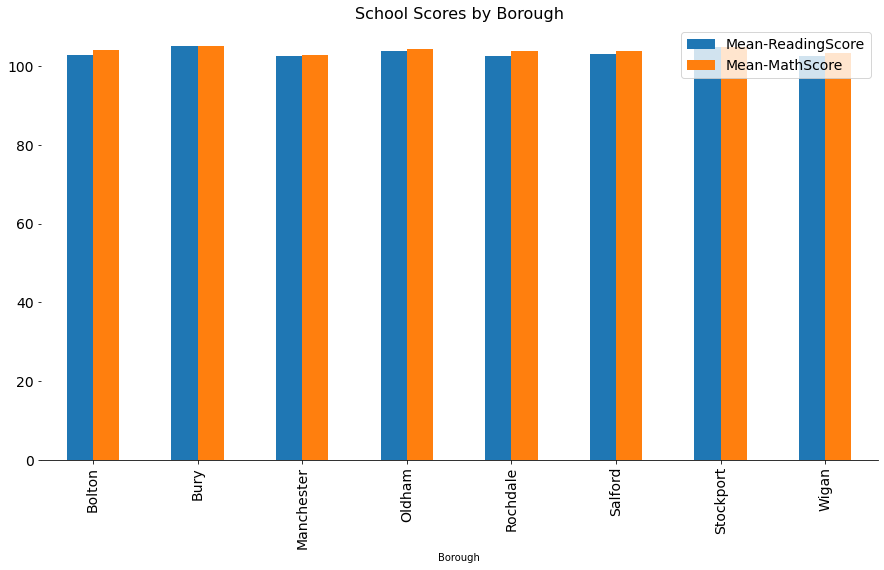

In [170]:
ax2 = mcrSchoolScores.plot(kind = 'bar',
                figsize = (15,8),
                width = 0.5,
                fontsize = 14)
ax2.set_title("School Scores by Borough", 
             fontsize = 16)
ax2.legend(fontsize = 14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)


In [210]:
#Let's normalise the scores so we can see the differences closer up

mcrSchoolScores['ReadingSchoolScore'] = (mcrSchoolScores['Mean-ReadingScore']-mcrSchoolScores['Mean-ReadingScore'].min())/(mcrSchoolScores['Mean-ReadingScore'].max()-mcrSchoolScores['Mean-ReadingScore'].min())
mcrSchoolScores['MathSchoolScore'] = (mcrSchoolScores['Mean-MathScore']-mcrSchoolScores['Mean-MathScore'].min())/(mcrSchoolScores['Mean-MathScore'].max()-mcrSchoolScores['Mean-MathScore'].min())
mcrNormSchoolScores = mcrSchoolScores[['MathSchoolScore','ReadingSchoolScore']]
mcrNormSchoolScores

,MathSchoolScore,ReadingSchoolScore
Borough,,
Bolton,0.547965,0.069459
Bury,1.000000,1.000000
Manchester,0.000000,0.000357
Oldham,0.692741,0.479385
Rochdale,0.491091,0.000000
Salford,0.424271,0.239213
Stockport,0.837815,0.849913
Wigan,0.178297,0.022405


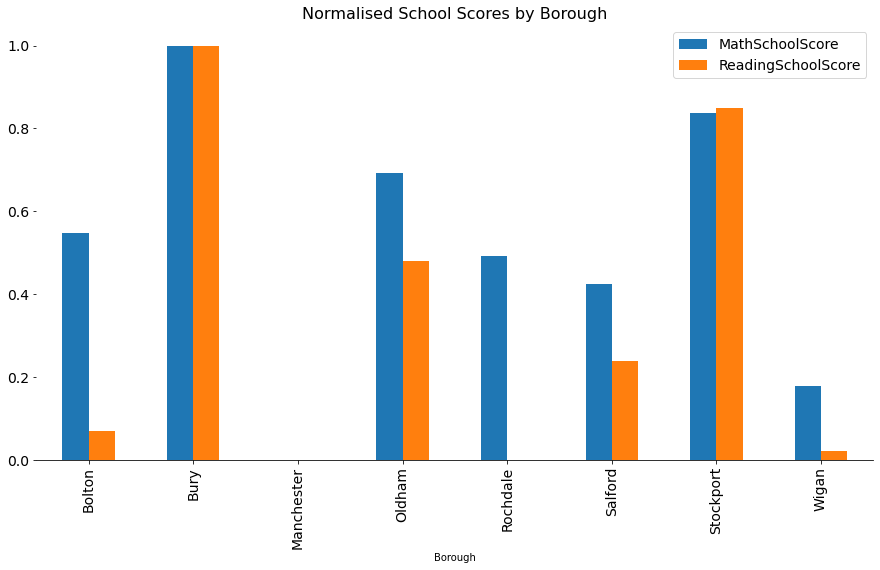

In [211]:
axS = mcrNormSchoolScores.plot(kind = 'bar',
                figsize = (15,8),
                width = 0.5,
                fontsize = 14)
axS.set_title("Normalised School Scores by Borough", 
             fontsize = 16)
axS.legend(fontsize = 14)
axS.spines['top'].set_visible(False)
axS.spines['right'].set_visible(False)
axS.spines['left'].set_visible(False)

### Crime and Safety

In [171]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(crime, test_size=0.05)

In [172]:
crimeBrgh

,Borough,Number
0,Bolton,3609
1,Bury,1822
2,Cheshire East,6
3,Manchester,8828
4,Oldham,2842
5,Rochdale,2510
6,Rossendale,1
7,Salford,2771
8,Stockport,2424
9,Tameside,2548


In [173]:
crimeBrgh.set_index('Borough')


,Number
Borough,
Bolton,3609
Bury,1822
Cheshire East,6
Manchester,8828
Oldham,2842
Rochdale,2510
Rossendale,1
Salford,2771
Stockport,2424


([<matplotlib.axis.XTick at 0x7f3c2323e898>,
 [Text(0, 0, 'Bolton '),
  Text(0, 0, 'Bury '),
  Text(0, 0, 'Cheshire East '),
  Text(0, 0, 'Manchester '),
  Text(0, 0, 'Oldham '),
  Text(0, 0, 'Rochdale '),
  Text(0, 0, 'Rossendale '),
  Text(0, 0, 'Salford '),
  Text(0, 0, 'Stockport '),
  Text(0, 0, 'Tameside '),
  Text(0, 0, 'Trafford '),
  Text(0, 0, 'Warrington '),
  Text(0, 0, 'West Lancashire '),
  Text(0, 0, 'Wigan ')])

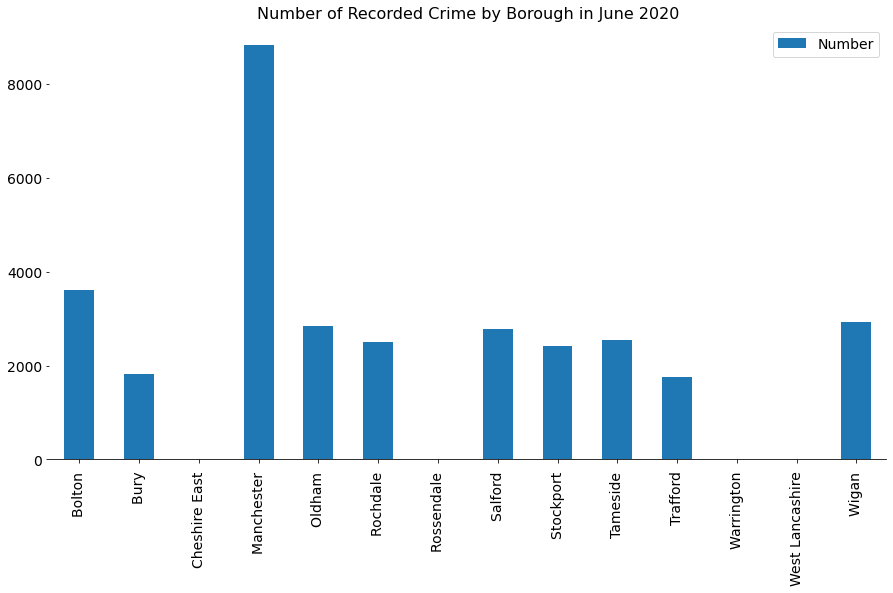

In [174]:
ax1 = crimeBrgh.plot(kind = 'bar',
                figsize = (15,8),
                width = 0.5,
                fontsize = 14)
ax1.set_title("Number of Recorded Crime by Borough in June 2020", 
             fontsize = 16)
ax1.legend(fontsize = 14)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_visible(False)
plt.xticks(crimeBrgh.index,crimeBrgh["Borough"].values)


In [175]:
# make a map of Manchester using folium
Cmap = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for clat, clng, cborough in zip(test['Latitude'], test['Longitude'], test['Borough']):
    clabel = '{}'.format(cborough)
    clabel2 = folium.Popup(clabel, parse_html=True)
    folium.CircleMarker(
        [clat, clng],
        radius=1,
        popup=clabel2,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Cmap)  
    
Cmap

### Restaurants

In [176]:
# make a map of Manchester using folium
mapRestaurant = folium.Map(location=[latitude, longitude], zoom_start=11)
	
# add markers to map
for lat, lng, borough in zip(restaurantloc['Venue Latitude'], restaurantloc['Venue Longitude'], restaurantloc['Venue']):
    label = '{}'.format(borough)
    label2 = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label2,
        color='yellow',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(mapRestaurant)  
    
mapRestaurant

**b. Cluster Analysis**   
In this part, we will conduct K-means clustering to group the boroughs according to what convenience facilities they have using Foursquare data.

In [177]:
print('There are {} uniques categories.'.format(len(venues['Venue Category'].unique())))

There are 128 uniques categories.


In [178]:
# One hot encoding before clustering
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

In [179]:
# Add borough name back to dataframe
borough = venues['BoroughName']
onehot.insert(0, 'BoroughName', borough)
onehot.head()

,BoroughName,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Bakery,Bar,Beer Bar,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Brewery,Burger Joint,Café,Canal Lock,Casino,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doctor's Office,Donut Shop,Electronics Store,...,Plaza,Pool,Portuguese Restaurant,Pub,Racetrack,Record Shop,Recreation Center,Restaurant,Roller Rink,Rugby Stadium,Sandwich Place,Science Museum,Shopping Mall,Shopping Plaza,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Wine Bar,Women's Store
0,Manchester,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Manchester,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Manchester,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Manchester,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Manchester,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [180]:
onehot.shape

(648, 129)

In [181]:
# Group rows by borough and take the mean of frequency of each venue category
grouped = onehot.groupby('BoroughName').mean().reset_index()
grouped

,BoroughName,American Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Bakery,Bar,Beer Bar,Beer Store,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Brewery,Burger Joint,Café,Canal Lock,Casino,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,Comedy Club,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Doctor's Office,Donut Shop,Electronics Store,...,Plaza,Pool,Portuguese Restaurant,Pub,Racetrack,Record Shop,Recreation Center,Restaurant,Roller Rink,Rugby Stadium,Sandwich Place,Science Museum,Shopping Mall,Shopping Plaza,Skate Park,Snack Place,Soccer Field,Soccer Stadium,Souvenir Shop,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Supermarket,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Track Stadium,Trail,Train Station,Tram Station,Vegetarian / Vegan Restaurant,Video Game Store,Warehouse Store,Wine Bar,Women's Store
0,Bolton,0.000000,0.000000,0.00,0.000000,0.011494,0.00,0.00,0.00,0.000000,0.000000,0.011494,0.000000,0.00,0.011494,0.000000,0.011494,0.00,0.00,0.00,0.000000,0.00,0.011494,0.011494,0.00,0.080460,0.00,0.057471,0.00,0.00,0.00,0.011494,0.00,0.011494,0.00,0.00,0.022989,0.00,0.00,0.011494,...,0.011494,0.00,0.000000,0.091954,0.011494,0.00,0.00,0.000000,0.000000,0.000000,0.034483,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.011494,0.00,0.000000,0.011494,0.057471,0.00,0.00,0.00,0.011494,0.00,0.000000,0.000000,0.000000,0.011494,0.000000,0.00,0.011494,0.011494,0.000000,0.00
1,Bury,0.000000,0.019231,0.00,0.019231,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.019231,0.000000,0.00,0.019231,0.019231,0.019231,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.057692,0.00,0.076923,0.00,0.00,0.00,0.000000,0.00,0.038462,0.00,0.00,0.076923,0.00,0.00,0.000000,...,0.000000,0.00,0.019231,0.134615,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.019231,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.038462,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.019231,0.019231,0.000000,0.00,0.019231,0.000000,0.000000,0.00
2,Manchester,0.000000,0.000000,0.01,0.000000,0.010000,0.01,0.01,0.00,0.000000,0.010000,0.020000,0.040000,0.01,0.010000,0.000000,0.000000,0.01,0.01,0.01,0.030000,0.01,0.010000,0.010000,0.01,0.000000,0.01,0.110000,0.01,0.01,0.01,0.010000,0.00,0.010000,0.02,0.00,0.010000,0.01,0.01,0.000000,...,0.020000,0.00,0.000000,0.080000,0.000000,0.01,0.01,0.010000,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.010000,0.00,0.00,0.010000,0.00,0.010000,0.000000,0.010000,0.02,0.01,0.01,0.010000,0.00,0.000000,0.010000,0.000000,0.000000,0.000000,0.02,0.000000,0.000000,0.000000,0.00
3,Oldham,0.014085,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.014085,0.00,0.014085,0.000000,0.000000,0.00,0.00,0.00,0.014085,0.00,0.000000,0.014085,0.00,0.056338,0.00,0.028169,0.00,0.00,0.00,0.014085,0.00,0.014085,0.00,0.00,0.056338,0.00,0.00,0.014085,...,0.000000,0.00,0.014085,0.056338,0.000000,0.00,0.00,0.000000,0.000000,0.014085,0.028169,0.00,0.000000,0.014085,0.014085,0.00,0.014085,0.014085,0.00,0.00,0.014085,0.00,0.014085,0.000000,0.070423,0.00,0.00,0.00,0.014085,0.00,0.000000,0.000000,0.000000,0.000000,0.014085,0.00,0.000000,0.014085,0.000000,0.00
4,Rochdale,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.019231,0.000000,0.00,0.000000,0.000000,0.019231,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.038462,0.00,0.038462,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.038462,0.00,0.00,0.019231,...,0.000000,0.00,0.000000,0.076923,0.000000,0.00,0.00,0.038462,0.000000,0.000000,0.038462,0.00,0.019231,0.019231,0.000000,0.00,0.000000,0.038462,0.00,0.00,0.000000,0.00,0.019231,0.000000,0.076923,0.00,0.00,0.00,0.019231,0.00,0.019231,0.000000,0.000000,0.000000,0.01

In [182]:
# top 5 venues for each Borough
num_top_venues = 5

for hood in grouped['BoroughName']:
    print("----"+hood+"----")
    temp = grouped[grouped['BoroughName'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bolton----
                  venue  freq
0                   Pub  0.09
1        Clothing Store  0.08
2  Fast Food Restaurant  0.07
3           Pizza Place  0.06
4         Grocery Store  0.06


----Bury----
            venue  freq
0             Pub  0.13
1  Discount Store  0.08
2     Coffee Shop  0.08
3           Hotel  0.06
4  Clothing Store  0.06


----Manchester----
               venue  freq
0        Coffee Shop  0.11
1                Pub  0.08
2  Indian Restaurant  0.06
3              Hotel  0.04
4           Beer Bar  0.04


----Oldham----
                  venue  freq
0  Fast Food Restaurant  0.07
1           Supermarket  0.07
2        Clothing Store  0.06
3        Discount Store  0.06
4     Indian Restaurant  0.06


----Rochdale----
           venue  freq
0            Pub  0.08
1    Supermarket  0.08
2  Grocery Store  0.06
3      Gastropub  0.04
4    Coffee Shop  0.04


----Salford----
                  venue  freq
0                   Bar  0.08
1           Coffee Shop  0.08
2

In [183]:
# Put into pandas dataframe
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['BoroughName']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['BoroughName'] = grouped['BoroughName']

for ind in np.arange(grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(grouped.iloc[ind, :], num_top_venues)

venues_sorted.head()

,BoroughName,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bolton,Pub,Clothing Store,Fast Food Restaurant,Supermarket,Pizza Place,Coffee Shop,Grocery Store,Furniture / Home Store,Sandwich Place,Gym / Fitness Center
1,Bury,Pub,Discount Store,Coffee Shop,Clothing Store,Hotel,Department Store,Grocery Store,Supermarket,Fast Food Restaurant,Pharmacy
2,Manchester,Coffee Shop,Pub,Indian Restaurant,Beer Bar,Hotel,Café,Park,Museum,Bar,Dessert Shop
3,Oldham,Supermarket,Fast Food Restaurant,Indian Restaurant,Grocery Store,Clothing Store,Pub,Discount Store,Italian Restaurant,Pizza Place,Sandwich Place
4,Rochdale,Supermarket,Pub,Grocery Store,Gastropub,Pizza Place,Sandwich Place,Clothing Store,Discount Store,Gym / Fitness Center,Coffee Shop


In [184]:
# K Means Clustering
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors

In [185]:
kclusters = 5
mcr_cluster = grouped.drop('BoroughName', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mcr_cluster)

kmeans.labels_[0:10] 

array([2, 3, 1, 2, 0, 1, 4, 2], dtype=int32)

In [186]:
# add clustering labels
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [187]:
mcr_merged = mcr_df
mcr_merged = mcr_merged.join(venues_sorted.set_index('BoroughName'), on='Borough')
mcr_merged

,Borough,Mean-ReadingScore,Mean-MathScore,Population,Latitude,Longitude,Median-PricePaid,Mean-PricePaid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bolton,102.720000,104.090000,"194,189",53.576866,-2.428219,128000.0,165499.729730,2,Pub,Clothing Store,Fast Food Restaurant,Supermarket,Pizza Place,Coffee Shop,Grocery Store,Furniture / Home Store,Sandwich Place,Gym / Fitness Center
1,Bury,105.200000,105.175000,"77,211",53.593460,-2.298540,160000.0,181432.515850,3,Pub,Discount Store,Coffee Shop,Clothing Store,Hotel,Department Store,Grocery Store,Supermarket,Fast Food Restaurant,Pharmacy
2,Manchester,102.535836,102.774744,"510,746",53.480759,-2.242631,165000.0,226208.930079,1,Coffee Shop,Pub,Indian Restaurant,Beer Bar,Hotel,Café,Park,Museum,Bar,Dessert Shop
3,Oldham,103.812500,104.437500,"96,555",53.540932,-2.111366,125000.0,146423.039216,2,Supermarket,Fast Food Restaurant,Indian Restaurant,Grocery Store,Clothing Store,Pub,Discount Store,Italian Restaurant,Pizza Place,Sandwich Place
4,Rochdale,102.534884,103.953488,"107,926",53.613600,-2.156100,125000.0,148055.183024,0,Supermarket,Pub,Grocery Store,Gastropub,Pizza Place,Sandwich Place,Clothing Store,Discount Store,Gym / Fitness Center,Coffee Shop
5,Salford,103.172414,103.793103,"103,886",53.487500,-2.290100,150010.0,193393.930185,1,Coffee Shop,Pub,Bar,Hotel,Gym / Fitness Center,Indian Restaurant,Park,Plaza,Cocktail Bar,Gym
6,Stockport,104.800000,104.785714,"105,878",53.410600,-2.157500,230050.0,282065.896332,4,Pub,Grocery Store,Coffee Shop,Supermarket,Pharmacy,Clothing Store,Pizza Place,Café,Discount Store,Hotel
7,Wigan,102.594595,103.202703,"103,608",53.545100,-2.632500,125000.0,172105.265248,2,Pub,Coffee Shop,Grocery Store,Clothing Store,Sandwich Place,Fast Food Restaurant,Discount Store,Chinese Restaurant,Gym,Pharmacy


In [189]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mcr_merged['Latitude'], mcr_merged['Longitude'], mcr_merged['Borough'], mcr_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=25,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Now let's observe each clusters and name them according to their characteristics

In [190]:
# Cluster 0: Pub and Grocery Stores
mcr_merged.loc[mcr_merged['Cluster Labels'] == 0, mcr_merged.columns[[0] + list(range(5, mcr_merged.shape[1]))]]

,Borough,Longitude,Median-PricePaid,Mean-PricePaid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Rochdale,-2.1561,125000.0,148055.183024,0,Supermarket,Pub,Grocery Store,Gastropub,Pizza Place,Sandwich Place,Clothing Store,Discount Store,Gym / Fitness Center,Coffee Shop


In [191]:
# Cluster 1: Lively area (Bars, Restaurants, Hotels)
mcr_merged.loc[mcr_merged['Cluster Labels'] == 1, mcr_merged.columns[[0] + list(range(5, mcr_merged.shape[1]))]]

,Borough,Longitude,Median-PricePaid,Mean-PricePaid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Manchester,-2.242631,165000.0,226208.930079,1,Coffee Shop,Pub,Indian Restaurant,Beer Bar,Hotel,Café,Park,Museum,Bar,Dessert Shop
5,Salford,-2.290100,150010.0,193393.930185,1,Coffee Shop,Pub,Bar,Hotel,Gym / Fitness Center,Indian Restaurant,Park,Plaza,Cocktail Bar,Gym


In [192]:
# Cluster 2: Busy area (Coffee shops, Restaurants, Grocery stores)
mcr_merged.loc[mcr_merged['Cluster Labels'] == 2, mcr_merged.columns[[0] + list(range(5, mcr_merged.shape[1]))]]

,Borough,Longitude,Median-PricePaid,Mean-PricePaid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bolton,-2.428219,128000.0,165499.729730,2,Pub,Clothing Store,Fast Food Restaurant,Supermarket,Pizza Place,Coffee Shop,Grocery Store,Furniture / Home Store,Sandwich Place,Gym / Fitness Center
3,Oldham,-2.111366,125000.0,146423.039216,2,Supermarket,Fast Food Restaurant,Indian Restaurant,Grocery Store,Clothing Store,Pub,Discount Store,Italian Restaurant,Pizza Place,Sandwich Place
7,Wigan,-2.632500,125000.0,172105.265248,2,Pub,Coffee Shop,Grocery Store,Clothing Store,Sandwich Place,Fast Food Restaurant,Discount Store,Chinese Restaurant,Gym,Pharmacy


In [193]:
# Cluster 3: Pubs, Small Stores and Shops
mcr_merged.loc[mcr_merged['Cluster Labels'] == 3, mcr_merged.columns[[0] + list(range(5, mcr_merged.shape[1]))]]

,Borough,Longitude,Median-PricePaid,Mean-PricePaid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Bury,-2.29854,160000.0,181432.51585,3,Pub,Discount Store,Coffee Shop,Clothing Store,Hotel,Department Store,Grocery Store,Supermarket,Fast Food Restaurant,Pharmacy


In [194]:
# Cluster 4: Grocery Stores, Restaurants and Shops
mcr_merged.loc[mcr_merged['Cluster Labels'] == 4, mcr_merged.columns[[0] + list(range(5, mcr_merged.shape[1]))]]

,Borough,Longitude,Median-PricePaid,Mean-PricePaid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Stockport,-2.1575,230050.0,282065.896332,4,Pub,Grocery Store,Coffee Shop,Supermarket,Pharmacy,Clothing Store,Pizza Place,Café,Discount Store,Hotel


### Property

In [195]:
PropertyLocMedianMean.head()
PPmcr = PropertyLocMedianMean[["Borough","Median-PricePaid","Mean-PricePaid"]].copy()
PPmcr

,Borough,Median-PricePaid,Mean-PricePaid
0,Manchester,165000.0,226208.930079
1,Bolton,128000.0,165499.729730
2,Rochdale,125000.0,148055.183024
3,Stockport,230050.0,282065.896332
4,Salford,150010.0,193393.930185
5,Wigan,125000.0,172105.265248
6,Oldham,125000.0,146423.039216
7,Bury,160000.0,181432.515850


([<matplotlib.axis.XTick at 0x7f3c22053f28>,
 [Text(0, 0, 'Manchester'),
  Text(0, 0, 'Bolton'),
  Text(0, 0, 'Rochdale'),
  Text(0, 0, 'Stockport'),
  Text(0, 0, 'Salford'),
  Text(0, 0, 'Wigan'),
  Text(0, 0, 'Oldham'),
  Text(0, 0, 'Bury')])

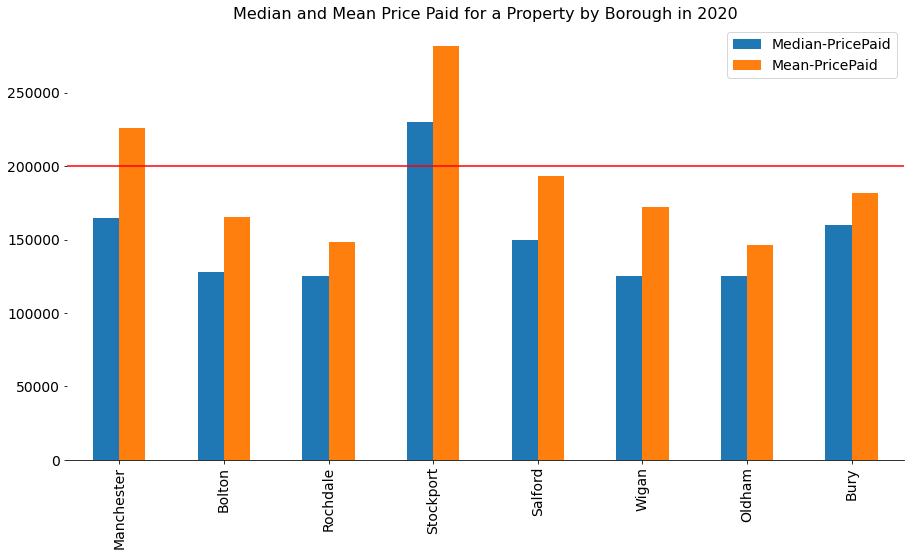

In [196]:
ax2 = PPmcr.plot(kind = 'bar',
                figsize = (15,8),
                width = 0.5,
                fontsize = 14)
ax2.set_title("Median and Mean Price Paid for a Property by Borough in 2020", 
             fontsize = 16)
ax2.legend(fontsize = 14)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.axhline(y=200000, xmin=0.0, xmax=1.0, color='r')

plt.xticks(PPmcr.index,PPmcr["Borough"].values)


### Results & Recommendation

Now we will review all the analysis made in this project before we make a conclusion on which area for the Willis Family to live.   

As mentioned in the beginning, our key criteria of location decision will be based on crime stats, property price, schools and restaurants.   



##### Crime and Safety   
Safety can be determined by the criminal cases indicated in the dataframe below.  

In [197]:
crimeBrgh['NormalizedScore'] = (crimeBrgh['Number']-crimeBrgh['Number'].min())/(crimeBrgh['Number'].max()-crimeBrgh['Number'].min())
crimeBrgh.sort_values(by=['NormalizedScore'])

,Borough,Number,NormalizedScore
6,Rossendale,1,0.000000
12,West Lancashire,3,0.000227
11,Warrington,5,0.000453
2,Cheshire East,6,0.000566
10,Trafford,1764,0.199728
1,Bury,1822,0.206299
8,Stockport,2424,0.274499
5,Rochdale,2510,0.284242
9,Tameside,2548,0.288547
7,Salford,2771,0.313810


##### School, Restaurants, Property Prices

This is the overview of the School, Restaurant and Property Price information as part of one Dataframe.

In [198]:
mcr_merged

,Borough,Mean-ReadingScore,Mean-MathScore,Population,Latitude,Longitude,Median-PricePaid,Mean-PricePaid,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bolton,102.720000,104.090000,"194,189",53.576866,-2.428219,128000.0,165499.729730,2,Pub,Clothing Store,Fast Food Restaurant,Supermarket,Pizza Place,Coffee Shop,Grocery Store,Furniture / Home Store,Sandwich Place,Gym / Fitness Center
1,Bury,105.200000,105.175000,"77,211",53.593460,-2.298540,160000.0,181432.515850,3,Pub,Discount Store,Coffee Shop,Clothing Store,Hotel,Department Store,Grocery Store,Supermarket,Fast Food Restaurant,Pharmacy
2,Manchester,102.535836,102.774744,"510,746",53.480759,-2.242631,165000.0,226208.930079,1,Coffee Shop,Pub,Indian Restaurant,Beer Bar,Hotel,Café,Park,Museum,Bar,Dessert Shop
3,Oldham,103.812500,104.437500,"96,555",53.540932,-2.111366,125000.0,146423.039216,2,Supermarket,Fast Food Restaurant,Indian Restaurant,Grocery Store,Clothing Store,Pub,Discount Store,Italian Restaurant,Pizza Place,Sandwich Place
4,Rochdale,102.534884,103.953488,"107,926",53.613600,-2.156100,125000.0,148055.183024,0,Supermarket,Pub,Grocery Store,Gastropub,Pizza Place,Sandwich Place,Clothing Store,Discount Store,Gym / Fitness Center,Coffee Shop
5,Salford,103.172414,103.793103,"103,886",53.487500,-2.290100,150010.0,193393.930185,1,Coffee Shop,Pub,Bar,Hotel,Gym / Fitness Center,Indian Restaurant,Park,Plaza,Cocktail Bar,Gym
6,Stockport,104.800000,104.785714,"105,878",53.410600,-2.157500,230050.0,282065.896332,4,Pub,Grocery Store,Coffee Shop,Supermarket,Pharmacy,Clothing Store,Pizza Place,Café,Discount Store,Hotel
7,Wigan,102.594595,103.202703,"103,608",53.545100,-2.632500,125000.0,172105.265248,2,Pub,Coffee Shop,Grocery Store,Clothing Store,Sandwich Place,Fast Food Restaurant,Discount Store,Chinese Restaurant,Gym,Pharmacy


**Restaurants**   
And from the cluster analysis made above, we will give each clusters a name according to the characteristics inferrable from the popular venues.

**Cluster 0** is **'Pub and Grocery Stores'** with gyms, parks, pools and golf courses as popular places.

In [199]:
mcr_merged.loc[mcr_merged['Cluster Labels'] == 0].Borough.unique()

array(['Rochdale'], dtype=object)

**Cluster 1** is **'Bars, Restaurants, Hotels'** with many pubs and restaurants.

In [200]:
mcr_merged.loc[mcr_merged['Cluster Labels'] == 1].Borough.unique()

array(['Manchester', 'Salford'], dtype=object)

**Cluster 2** is **'Coffee shops, Restaurants, Grocery stores'** with many coffee shops and clothing stores.

In [201]:
mcr_merged.loc[mcr_merged['Cluster Labels'] == 2].Borough.unique()

array(['Bolton', 'Oldham', 'Wigan'], dtype=object)

**Cluster 3** is **'Pubs, Small Stores and Shops '** with cafe, bus stop, and yoga studio as top venues.

In [202]:
mcr_merged.loc[mcr_merged['Cluster Labels'] == 3].Borough.unique()

array(['Bury'], dtype=object)

**Cluster 4** is **'Grocery Stores, Restaurants and Shops '** with bed & breakfast, hotels, and airport.

In [203]:
mcr_merged.loc[mcr_merged['Cluster Labels'] == 4].Borough.unique()

array(['Stockport'], dtype=object)

##### Weighted score table
Calculating the scores of each borough.

In [204]:
score = mcr_merged[['Borough','Median-PricePaid','Mean-ReadingScore','Mean-MathScore','Cluster Labels']].copy()
score.head()

,Borough,Median-PricePaid,Mean-ReadingScore,Mean-MathScore,Cluster Labels
0,Bolton,128000.0,102.720000,104.090000,2
1,Bury,160000.0,105.200000,105.175000,3
2,Manchester,165000.0,102.535836,102.774744,1
3,Oldham,125000.0,103.812500,104.437500,2
4,Rochdale,125000.0,102.534884,103.953488,0


Normalise the School Scores

In [205]:
score['ReadingSchoolScore'] = (score['Mean-ReadingScore']-score['Mean-ReadingScore'].min())/(score['Mean-ReadingScore'].max()-score['Mean-ReadingScore'].min())

score['MathSchoolScore'] = (score['Mean-MathScore']-score['Mean-MathScore'].min())/(score['Mean-MathScore'].max()-score['Mean-MathScore'].min())




In [206]:
score

,Borough,Median-PricePaid,Mean-ReadingScore,Mean-MathScore,Cluster Labels,ReadingSchoolScore,MathSchoolScore
0,Bolton,128000.0,102.720000,104.090000,2,0.069459,0.547965
1,Bury,160000.0,105.200000,105.175000,3,1.000000,1.000000
2,Manchester,165000.0,102.535836,102.774744,1,0.000357,0.000000
3,Oldham,125000.0,103.812500,104.437500,2,0.479385,0.692741
4,Rochdale,125000.0,102.534884,103.953488,0,0.000000,0.491091
5,Salford,150010.0,103.172414,103.793103,1,0.239213,0.424271
6,Stockport,230050.0,104.800000,104.785714,4,0.849913,0.837815
7,Wigan,125000.0,102.594595,103.202703,2,0.022405,0.178297


### Conclusion

Counting up all the scores from the results section there are 2 potential locations that the Willis Family should focus on, Bury and Oldham.  However, each location does not offer all 4 requirements and therefore it will be down to which criteria they value more.  Oldham has more Restaurants but has slightly more Crime incidents compared to Bury, which has fewer Restaurants but less crime.
Both locations in Greater Manchester are suitable to move to, and it is now down to personal preference for the Willis Family.


**Limitations**   
Using Foursquare API, information could be collected for various venues around Manchester however not all venue categories appear to have been available.  In this exercise it appeared that Schools could not be easily filtered out from Foursquare unless the actual school name was known, this lead to having to go to other publicly available sources to obtain their information.

One of the other challenges in this was that when using Wikipedia to extract the Borough information there appeared to be inconsistencies between different wiki pages as to what were the main Boroughs, as some lists were longer than others.  So clearly the definition of a Borough will vary depending on the source you would use. 
